## Import Libraries


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Load Dataset

file_path = 'Train.csv'  # Update if necessary
df = pd.read_csv(file_path)
df.head()

## Constructing the Logistics Network

In [2]:
G = nx.Graph()

# Adding edges between warehouses and shipment modes
for _, row in df[['Warehouse_block', 'Mode_of_Shipment']].iterrows():
    warehouse = row['Warehouse_block']
    shipment_mode = row['Mode_of_Shipment']
    
    # Add edge with weight based on occurrence
    if G.has_edge(warehouse, shipment_mode):
        G[warehouse][shipment_mode]['weight'] += 1
    else:
        G.add_edge(warehouse, shipment_mode, weight=1)

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

NameError: name 'df' is not defined

## Identifying Important Warehouses

In [3]:
centrality = nx.degree_centrality(G)
important_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top 3 Important Nodes:', important_nodes)

Top 3 Important Nodes: []


## Visualizing the Logistics Network

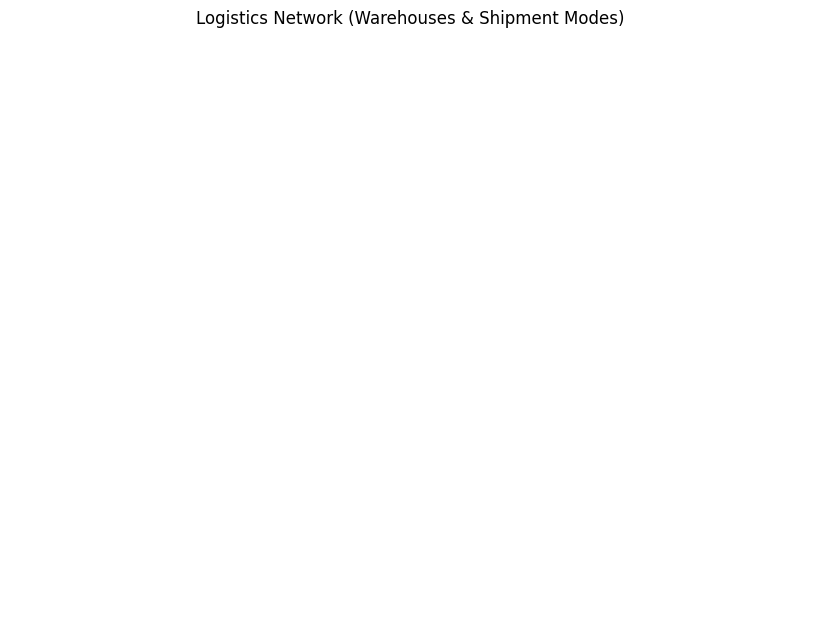

In [4]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', 
        node_size=1500, font_size=10)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Logistics Network (Warehouses & Shipment Modes)')
plt.show()